# Understanding Basic Statistics

## Chapter 2



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

### Section 2.1 _Frequency Distributions, Histograms, and Related Topics_


In [2]:
def str_to_arr(s):
    '''
    converts a str of space separeted values to an array
    '''
    res = map(int, s.split())
    res = np.array(list(res))
    return res


In [3]:
table_2_1_str = '''
13 47 10 3 16 20 17 40 4 2 
7 25 8 21 19 15 3 17 14 6 
12 45 1 8 4 16 11 18 23 12 
6 2 14 13 7 15 46 12 9 18 
34 13 41 28 36 17 24 27 29 9 
14 26 10 24 37 31 8 16 12 16
'''

data = str_to_arr(table_2_1_str)

data

array([13, 47, 10,  3, 16, 20, 17, 40,  4,  2,  7, 25,  8, 21, 19, 15,  3,
       17, 14,  6, 12, 45,  1,  8,  4, 16, 11, 18, 23, 12,  6,  2, 14, 13,
        7, 15, 46, 12,  9, 18, 34, 13, 41, 28, 36, 17, 24, 27, 29,  9, 14,
       26, 10, 24, 37, 31,  8, 16, 12, 16])

In [4]:
def class_width(min_val, max_val, num_classes):
    '''
    returns class width, p. 45
    '''
    return int(((max_val - min_val) / num_classes) + 1)

#### np.histogram
https://numpy.org/doc/stable/reference/generated/numpy.histogram.html

In [5]:
classes = 6
width = class_width(data.min(), data.max(), classes)
print(f'width: {width}')

freq, edges = np.histogram(data, range=(data.min(), width*classes), bins=classes)
print(f'freq: {freq}')
print(f'edges: {edges}')

lower_limits = np.array([data.min() + n * width for n in range(classes)])
print(f'lower_limits: {lower_limits}')

upper_limits = lower_limits + width - 1
print(f'upper_limits: {upper_limits}')

# bounds = np.hstack((lower_limits - 0.5, upper_limits[-1] + 0.5))
bounds = np.array([data.min() - 0.5 + n * width for n in range(classes + 1)])
print(f'bounds: {bounds}')

midpts = (lower_limits + upper_limits) / 2
print(f'midpts: {midpts}')

rel_freq = freq / data.size
print(f'rel_freq: {rel_freq}')

width: 8
freq: [14 21 11  6  4  4]
edges: [ 1.          8.83333333 16.66666667 24.5        32.33333333 40.16666667
 48.        ]
lower_limits: [ 1  9 17 25 33 41]
upper_limits: [ 8 16 24 32 40 48]
bounds: [ 0.5  8.5 16.5 24.5 32.5 40.5 48.5]
midpts: [ 4.5 12.5 20.5 28.5 36.5 44.5]
rel_freq: [0.23333333 0.35       0.18333333 0.1        0.06666667 0.06666667]


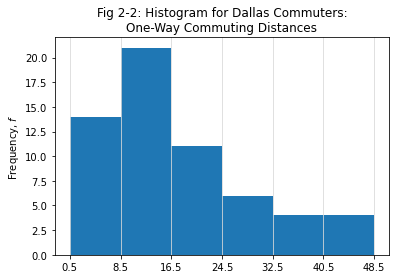

In [6]:
# Figure 2-2
plt.hist(bounds[:-1], bounds, weights=freq)
plt.title('Fig 2-2: Histogram for Dallas Commuters:\nOne-Way Commuting Distances')
plt.ylabel(r'Frequency, $f$')
plt.grid(axis='x', color='0.85')
plt.xticks(bounds)
plt.show()

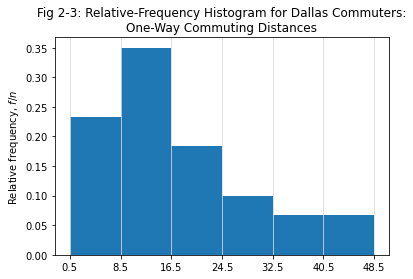

In [7]:
# Figure 2-3
plt.hist(bounds[:-1], bounds, weights=rel_freq)
plt.title('Fig 2-3: Relative-Frequency Histogram for Dallas Commuters:\nOne-Way Commuting Distances')
plt.ylabel(r'Relative frequency, $f/n$')
plt.grid(axis='x', color='0.85')
plt.xticks(bounds)
plt.show()

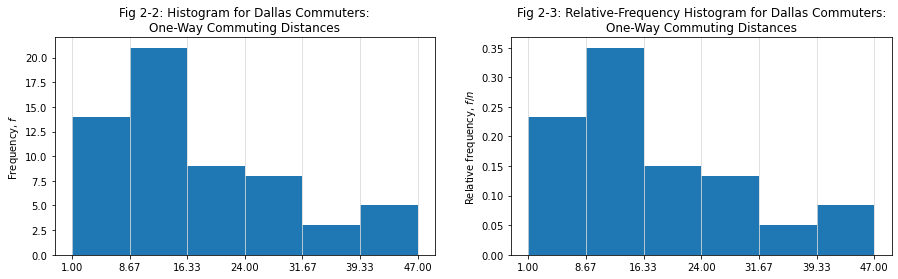

In [8]:
# Standard NumPy
freq, edges = np.histogram(data, bins=classes)
rel_freq = freq / data.size

fig, ax = plt.subplots(1, 2, figsize=(15, 4))

ax[0].hist(data, bins=classes)
ax[0].set_title('Fig 2-2: Histogram for Dallas Commuters:\nOne-Way Commuting Distances')
ax[0].set_ylabel(r'Frequency, $f$')
ax[0].grid(axis='x', color='0.85')
ax[0].set_xticks(edges)

ax[1].hist(edges[:-1], edges, weights=rel_freq)
ax[1].set_title('Fig 2-3: Relative-Frequency Histogram for Dallas Commuters:\nOne-Way Commuting Distances')
ax[1].set_ylabel(r'Relative frequency, $f/n$')
ax[1].grid(axis='x', color='0.85')
ax[1].set_xticks(edges)

plt.show()

In [9]:
def class_limits(min_val, classes, cls_width):
    '''
    '''
    lower_limits = np.array([min_val + n * cls_width for n in range(classes)])
    upper_limits = lower_limits + cls_width - 1
    
    res = [(a, b) for a, b in (zip(lower_limits, upper_limits))]
    
    return res


In [10]:
def freq_dist(data, classes, titles=('','')):
    '''
    '''
    if isinstance(titles, str):
        titles = (titles, titles)
    
    print(f'min: {data.min()}  max: {data.max()}  size: {data.size}')

    cls_width = class_width(data.min(), data.max(), classes)
    print(f'class width: {cls_width}')

    freq, edges = np.histogram(data, range=(data.min(), data.min() + cls_width*classes), bins=classes)
    print(f'freq: {freq}')
#     print(f'edges: {edges}')

    cls_limits = class_limits(data.min(), classes, cls_width)
    print(f'cls_limits: {cls_limits}')

    bounds = np.array([data.min() - 0.5 + n * cls_width for n in range(classes + 1)])
    print(f'boundaries: {bounds}')

    midpts = [sum(e) / 2 for e in cls_limits]
    print(f'midpts: {midpts}')

    rel_freq = freq / data.size
    print(f'rel_freq: {rel_freq}')
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 4))

    ax[0].hist(bounds[:-1], bounds, weights=freq)
    ax[0].set_title(titles[0])
    ax[0].set_ylabel(r'Frequency, $f$')
    ax[0].grid(axis='x', color='0.85')
    ax[0].set_xticks(bounds)

    ax[1].hist(bounds[:-1], bounds, weights=rel_freq)
    ax[1].set_title(titles[0])
    ax[1].set_ylabel(r'Relative frequency, $f/n$')
    ax[1].grid(axis='x', color='0.85')
    ax[1].set_xticks(bounds)

    plt.show()
    

In [11]:
def ogive(data, classes, title=''):
    '''
    '''
    cls_width = class_width(data.min(), data.max(), classes)
    print(f'class width: {cls_width}')

    freq, edges = np.histogram(data, range=(data.min(), data.min() + cls_width*classes), bins=classes)
    print(f'freq: {freq}')
    cumulative = np.cumsum(np.hstack(([0],freq)))
    print(f'cumulative: {cumulative}')

    bounds = np.array([data.min() - 0.5 + n * cls_width for n in range(classes + 1)])
    print(f'boundaries: {bounds}')

    fig, ax0 = plt.subplots(1, 1, figsize=(6, 4))

    ax0.plot(bounds, cumulative, 'ro-')
    ax0.set_title(title)
    ax0.set_ylabel(r'Cumulative frequency, $\Sigma f$')
    ax0.grid(axis='x', color='0.85')
    ax0.set_xticks(bounds)

    plt.show()


data:
[ 1  5  5  6  7  4  8  7  6  5  5  6  7  6  6  5  8  9  9 10  7  8 11  2
  4  6  5 12 13  6  3  7  8  8  9  9 10  9  8  9]

min: 1  max: 13  size: 40
class width: 3
freq: [ 3 15 17  4  1]
cls_limits: [(1, 3), (4, 6), (7, 9), (10, 12), (13, 15)]
boundaries: [ 0.5  3.5  6.5  9.5 12.5 15.5]
midpts: [2.0, 5.0, 8.0, 11.0, 14.0]
rel_freq: [0.075 0.375 0.425 0.1   0.025]


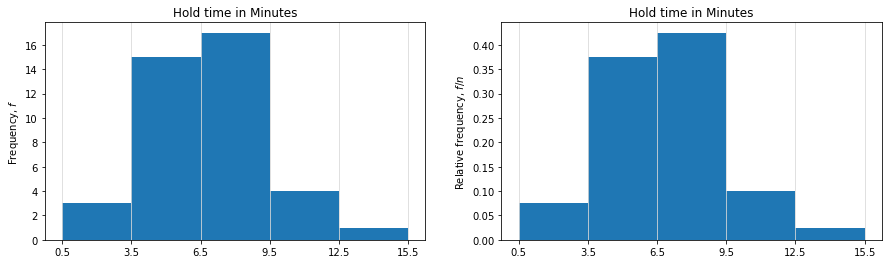

In [12]:
# Guided Exercise 1

data = str_to_arr('''
    1 5 5 6 7 4 8 7 6 5 
    5 6 7 6 6 5 8 9 9 10 
    7 8 11 2 4 6 5 12 13 6 
    3 7 8 8 9 9 10 9 8 9
''')

print(f'data:\n{data}\n')

classes = 5
freq_dist(data, classes, titles='Hold time in Minutes')

In [13]:
# Sec 2.1 Problem 5
min_val = 20
max_val = 82
classes = 7
cls_width = class_width(min_val, max_val, classes)
print(f'cls_width: {cls_width}')

cls_limits = class_limits(min_val, classes, cls_width)
print(f'cls_limits: {cls_limits}')


cls_width: 9
cls_limits: [(20, 28), (29, 37), (38, 46), (47, 55), (56, 64), (65, 73), (74, 82)]


In [14]:
# Sec 2.1 Problem 6
min_val = 10
max_val = 120
classes = 5
cls_width = class_width(min_val, max_val, classes)
print(f'cls_width: {cls_width}')

cls_limits = class_limits(min_val, classes, cls_width)
print(f'cls_limits: {cls_limits}')


cls_width: 23
cls_limits: [(10, 32), (33, 55), (56, 78), (79, 101), (102, 124)]


data:
[ 54  55  55  57  57  59  60  65  65  65  66  68  68  69  69  70  70  70
  75  75  75  75  77  82  82  82  88  89  89  91  91  97  98  98  98 280]

min: 54  max: 280  size: 36
class width: 38
freq: [31  4  0  0  0  1]
cls_limits: [(54, 91), (92, 129), (130, 167), (168, 205), (206, 243), (244, 281)]
boundaries: [ 53.5  91.5 129.5 167.5 205.5 243.5 281.5]
midpts: [72.5, 110.5, 148.5, 186.5, 224.5, 262.5]
rel_freq: [0.86111111 0.11111111 0.         0.         0.         0.02777778]


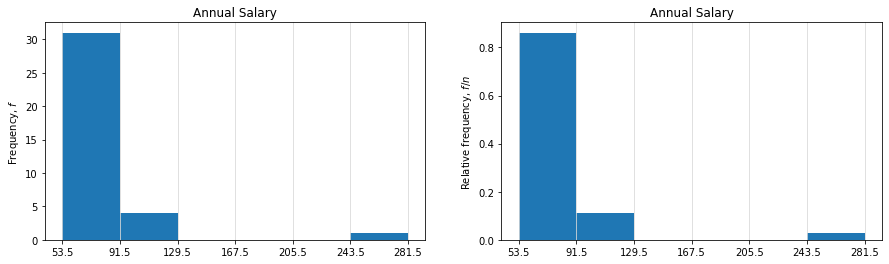

In [15]:
# Sec 2.1 Problem 10
data = str_to_arr('''
        54 55 55 57 57 59 60 65 65 65 66 68 68 
        69 69 70 70 70 75 75 75 75 77 82 82 82 
        88 89 89 91 91 97 98 98 98 280
    ''')

print(f'data:\n{data}\n')

classes = 6
freq_dist(data, classes, titles='Annual Salary')

data:
[54 55 55 57 57 59 60 65 65 65 66 68 68 69 69 70 70 70 75 75 75 75 77 82
 82 82 88 89 89 91 91 97 98 98 98]

min: 54  max: 98  size: 35
class width: 9
freq: [ 7 11  5  6  6]
cls_limits: [(54, 62), (63, 71), (72, 80), (81, 89), (90, 98)]
boundaries: [53.5 62.5 71.5 80.5 89.5 98.5]
midpts: [58.0, 67.0, 76.0, 85.0, 94.0]
rel_freq: [0.2        0.31428571 0.14285714 0.17142857 0.17142857]


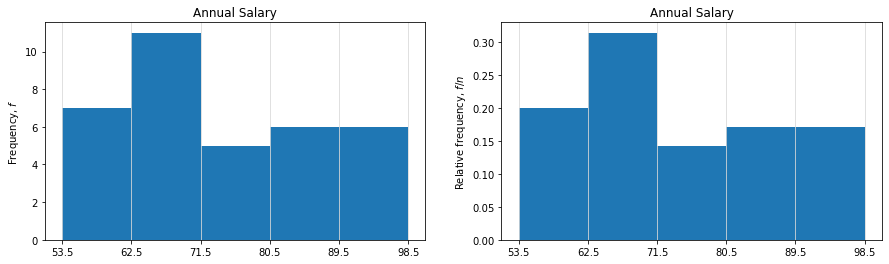

In [16]:
# Sec 2.1 Problem 10, part 2
data = str_to_arr('''
        54 55 55 57 57 59 60 65 65 65 66 68 68 
        69 69 70 70 70 75 75 75 75 77 82 82 82 
        88 89 89 91 91 97 98 98 98 
    ''')

print(f'data:\n{data}\n')

classes = 5
freq_dist(data, classes, titles='Annual Salary')

   Finish times (to the nearest hour)
0                                 261
1                                 271
2                                 236
3                                 244
4                                 279 

min: 236  max: 360  size: 57
class width: 25
freq: [ 4  9 25 16  3]
cls_limits: [(236, 260), (261, 285), (286, 310), (311, 335), (336, 360)]
boundaries: [235.5 260.5 285.5 310.5 335.5 360.5]
midpts: [248.0, 273.0, 298.0, 323.0, 348.0]
rel_freq: [0.07017544 0.15789474 0.43859649 0.28070175 0.05263158]


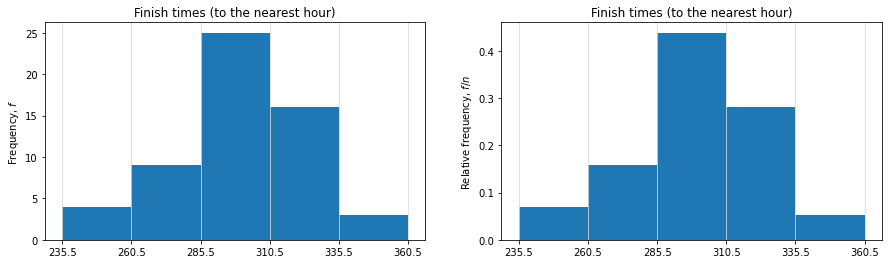

class width: 25
freq: [ 4  9 25 16  3]
cumulative: [ 0  4 13 38 54 57]
boundaries: [235.5 260.5 285.5 310.5 335.5 360.5]


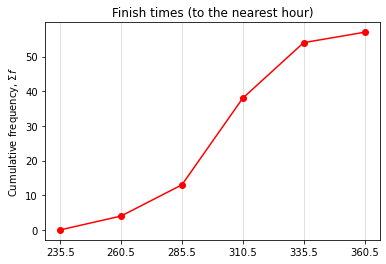

In [17]:
# Sec 2.1 Problem 15
path = '/home/mark/Documents/Class/Understanding Basic Statistics/Data/Chapter 2'
fn = 'Prob201_15.xlsx'
df = pd.read_excel(os.path.join(path, fn))
cols = df.columns.values.tolist()
print(df.head(), '\n')

data = df.iloc[:,0]
# print(f'data:\n{data}')

classes = 5
title = cols[0]
freq_dist(data, classes, title)
ogive(data, classes, title)


   glucose_(mg/100ml)
0                  45
1                  66
2                  83
3                  71
4                  76 

min: 45  max: 109  size: 70
class width: 11
freq: [ 3  7 22 26  9  3]
cls_limits: [(45, 55), (56, 66), (67, 77), (78, 88), (89, 99), (100, 110)]
boundaries: [ 44.5  55.5  66.5  77.5  88.5  99.5 110.5]
midpts: [50.0, 61.0, 72.0, 83.0, 94.0, 105.0]
rel_freq: [0.04285714 0.1        0.31428571 0.37142857 0.12857143 0.04285714]


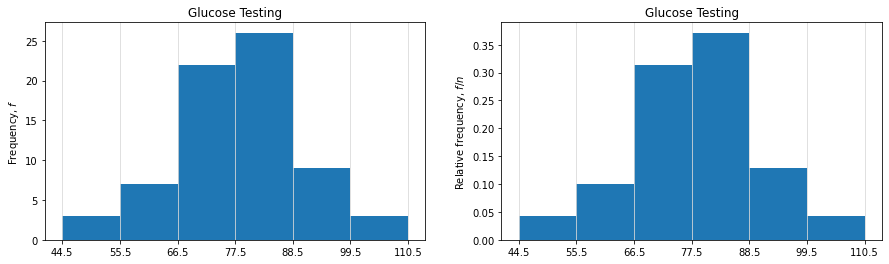

class width: 11
freq: [ 3  7 22 26  9  3]
cumulative: [ 0  3 10 32 58 67 70]
boundaries: [ 44.5  55.5  66.5  77.5  88.5  99.5 110.5]


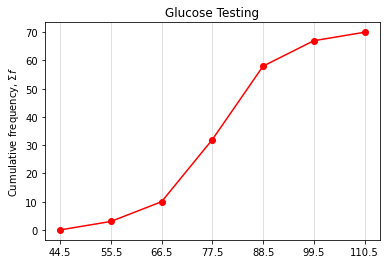

In [18]:
# Sec 2.1 Problem 16
path = '/home/mark/Documents/Class/Understanding Basic Statistics/Data/Chapter 2'
fn = 'Prob0201_16.xls'
df = pd.read_excel(os.path.join(path, fn))
cols = df.columns.values.tolist()
print(df.head(), '\n')

data = df.iloc[:,0]
# print(f'data:\n{data}')

classes = 6
title = 'Glucose Testing'
freq_dist(data, classes, title)
ogive(data, classes, title)


   time_(months)
0             19
1             18
2             17
3              1
4             21 

min: 1  max: 59  size: 42
class width: 12
freq: [ 6 10  5 13  8]
cls_limits: [(1, 12), (13, 24), (25, 36), (37, 48), (49, 60)]
boundaries: [ 0.5 12.5 24.5 36.5 48.5 60.5]
midpts: [6.5, 18.5, 30.5, 42.5, 54.5]
rel_freq: [0.14285714 0.23809524 0.11904762 0.30952381 0.19047619]


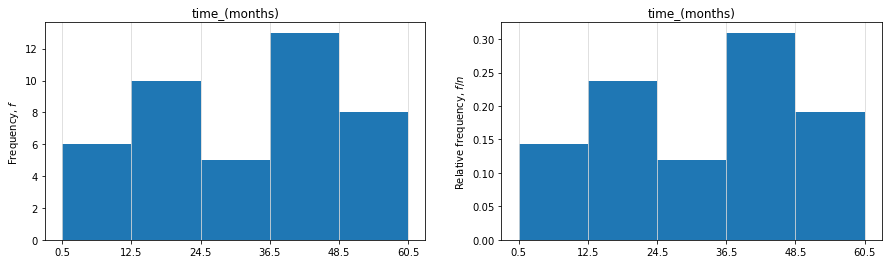

class width: 12
freq: [ 6 10  5 13  8]
cumulative: [ 0  6 16 21 34 42]
boundaries: [ 0.5 12.5 24.5 36.5 48.5 60.5]


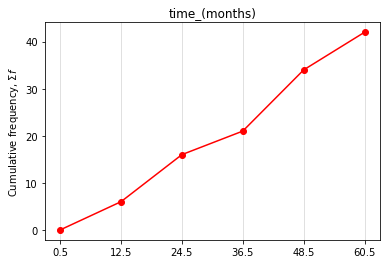

In [19]:
# Sec 2.1 Problem 17
path = '/home/mark/Documents/Class/Understanding Basic Statistics/Data/Chapter 2'
fn = 'Prob0201_17.xls'
df = pd.read_excel(os.path.join(path, fn))
cols = df.columns.values.tolist()
print(df.head(), '\n')

data = df.iloc[:,0]
# print(f'data:\n{data}')

classes = 5
title = cols[0]
freq_dist(data, classes, title)
ogive(data, classes, title)


   depth_(cm)
0          85
1          45
2          75
3          60
4          90 

min: 10  max: 200  size: 73
class width: 28
freq: [ 7 25 26  9  5  0  1]
cls_limits: [(10, 37), (38, 65), (66, 93), (94, 121), (122, 149), (150, 177), (178, 205)]
boundaries: [  9.5  37.5  65.5  93.5 121.5 149.5 177.5 205.5]
midpts: [23.5, 51.5, 79.5, 107.5, 135.5, 163.5, 191.5]
rel_freq: [0.09589041 0.34246575 0.35616438 0.12328767 0.06849315 0.
 0.01369863]


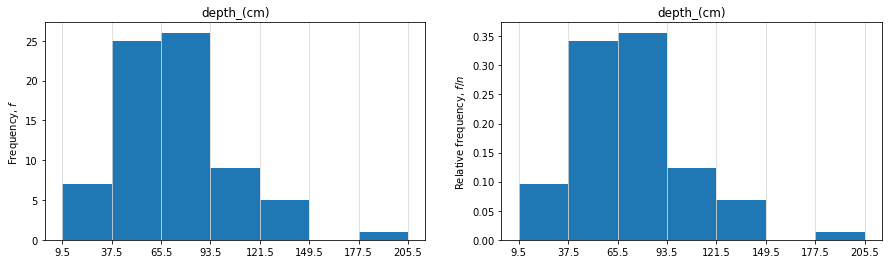

class width: 28
freq: [ 7 25 26  9  5  0  1]
cumulative: [ 0  7 32 58 67 72 72 73]
boundaries: [  9.5  37.5  65.5  93.5 121.5 149.5 177.5 205.5]


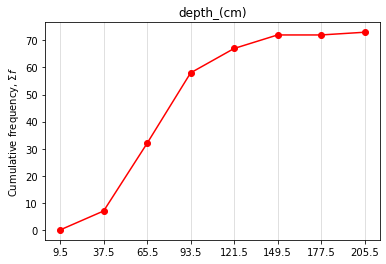

In [20]:
# Sec 2.1 Problem 18
path = '/home/mark/Documents/Class/Understanding Basic Statistics/Data/Chapter 2'
fn = 'Prob0201_18.xls'
df = pd.read_excel(os.path.join(path, fn))
cols = df.columns.values.tolist()
print(df.head(), '\n')

data = df.iloc[:,0]
# print(f'data:\n{data}')

classes = 7
title = cols[0]
freq_dist(data, classes, title)
ogive(data, classes, title)


   depth_(cm)
0          85
1          45
2          75
3          60
4          90 

min: 10  max: 145  size: 72
class width: 20
freq: [ 4 10 20 20 10  5  3]
cls_limits: [(10, 29), (30, 49), (50, 69), (70, 89), (90, 109), (110, 129), (130, 149)]
boundaries: [  9.5  29.5  49.5  69.5  89.5 109.5 129.5 149.5]
midpts: [19.5, 39.5, 59.5, 79.5, 99.5, 119.5, 139.5]
rel_freq: [0.05555556 0.13888889 0.27777778 0.27777778 0.13888889 0.06944444
 0.04166667]


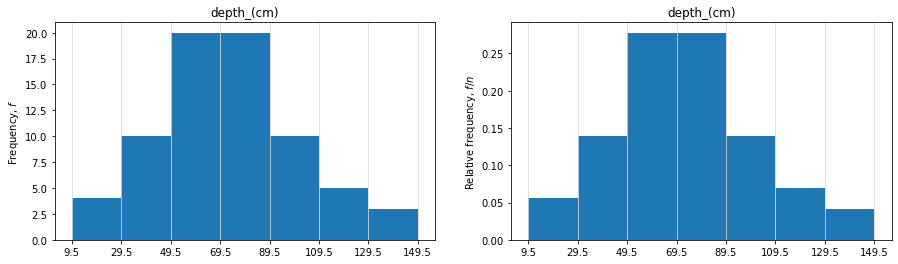

class width: 20
freq: [ 4 10 20 20 10  5  3]
cumulative: [ 0  4 14 34 54 64 69 72]
boundaries: [  9.5  29.5  49.5  69.5  89.5 109.5 129.5 149.5]


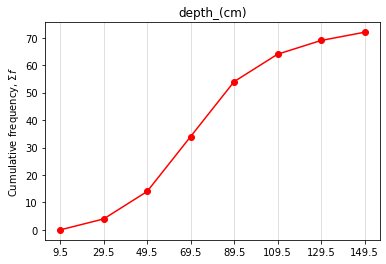

In [21]:
# Sec 2.1 Problem 18, part 2
path = '/home/mark/Documents/Class/Understanding Basic Statistics/Data/Chapter 2'
fn = 'Prob0201_18.xls'
df = pd.read_excel(os.path.join(path, fn))
cols = df.columns.values.tolist()
print(df.head(), '\n')

data = df.iloc[:,0].loc[(df<200).any(1)]
# print(f'data:\n{data}')

classes = 7
title = cols[0]
freq_dist(data, classes, title)
ogive(data, classes, title)


   Percentage male
0               31
1               39
2               53
3               47
4               40 

min: 26  max: 79  size: 50
class width: 11
freq: [ 4 21 22  1  2]
cls_limits: [(26, 36), (37, 47), (48, 58), (59, 69), (70, 80)]
boundaries: [25.5 36.5 47.5 58.5 69.5 80.5]
midpts: [31.0, 42.0, 53.0, 64.0, 75.0]
rel_freq: [0.08 0.42 0.44 0.02 0.04]


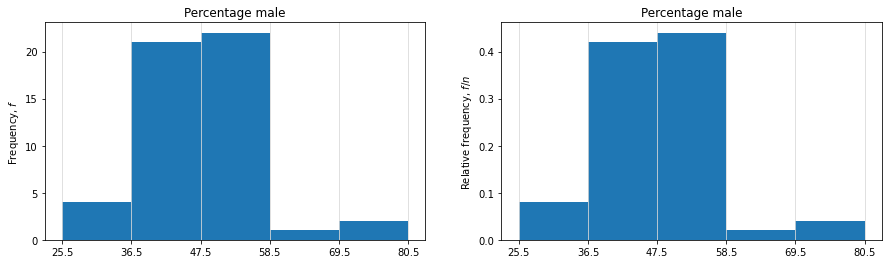

class width: 11
freq: [ 4 21 22  1  2]
cumulative: [ 0  4 25 47 48 50]
boundaries: [25.5 36.5 47.5 58.5 69.5 80.5]


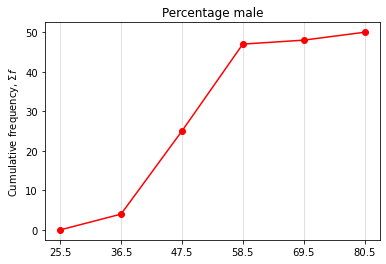

In [22]:
# Sec 2.1 Problem 19
path = '/home/mark/Documents/Class/Understanding Basic Statistics/Data/Chapter 2'
fn = 'Prob0201_19.xlsx'
df = pd.read_excel(os.path.join(path, fn))
cols = df.columns.values.tolist()
print(df.head(), '\n')

data = df.iloc[:,0]
# print(f'data:\n{data}')

classes = 5
title = cols[0]
freq_dist(data, classes, title)
ogive(data, classes, title)


   words
0     34
1     21
2     37
3     31
4     10 

min: 0  max: 43  size: 55
class width: 6
freq: [13 15 11  3  6  4  2  1]
cls_limits: [(0, 5), (6, 11), (12, 17), (18, 23), (24, 29), (30, 35), (36, 41), (42, 47)]
boundaries: [-0.5  5.5 11.5 17.5 23.5 29.5 35.5 41.5 47.5]
midpts: [2.5, 8.5, 14.5, 20.5, 26.5, 32.5, 38.5, 44.5]
rel_freq: [0.23636364 0.27272727 0.2        0.05454545 0.10909091 0.07272727
 0.03636364 0.01818182]


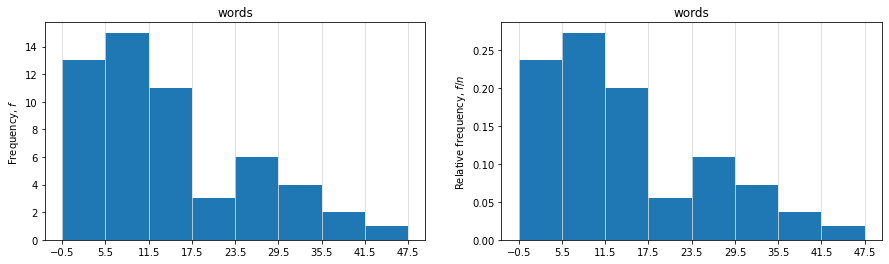

class width: 6
freq: [13 15 11  3  6  4  2  1]
cumulative: [ 0 13 28 39 42 48 52 54 55]
boundaries: [-0.5  5.5 11.5 17.5 23.5 29.5 35.5 41.5 47.5]


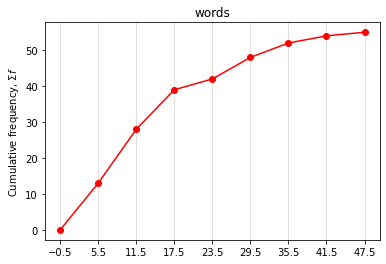

In [23]:
# Sec 2.1 Problem 20
path = '/home/mark/Documents/Class/Understanding Basic Statistics/Data/Chapter 2'
fn = 'Prob0201_20.xls'
df = pd.read_excel(os.path.join(path, fn))
cols = df.columns.values.tolist()
print(df.head(), '\n')

data = df.iloc[:,0]
# print(f'data:\n{data}')

classes = 8
title = cols[0]
freq_dist(data, classes, title)
ogive(data, classes, title)


   wheat_(tonnes)
0            2.71
1            1.62
2            2.60
3            1.64
4            2.20 

data:
0    271.0
1    162.0
2    260.0
3    164.0
4    220.0
Name: wheat_(tonnes), dtype: float64

min: 46.0  max: 282.0  size: 32
class width: 40
freq: [ 4  5 10  5  5  3]
cls_limits: [(46.0, 85.0), (86.0, 125.0), (126.0, 165.0), (166.0, 205.0), (206.0, 245.0), (246.0, 285.0)]
boundaries: [ 45.5  85.5 125.5 165.5 205.5 245.5 285.5]
midpts: [65.5, 105.5, 145.5, 185.5, 225.5, 265.5]
rel_freq: [0.125   0.15625 0.3125  0.15625 0.15625 0.09375]


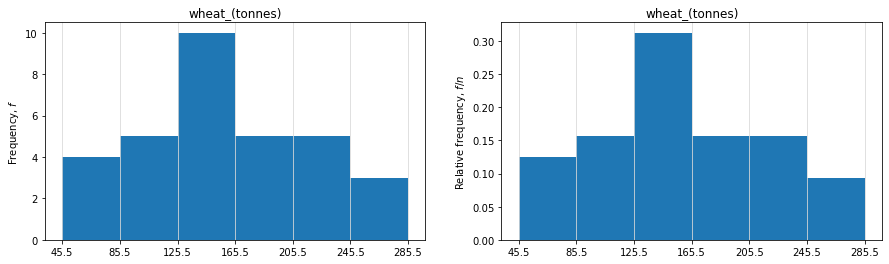

class width: 40
freq: [ 4  5 10  5  5  3]
cumulative: [ 0  4  9 19 24 29 32]
boundaries: [ 45.5  85.5 125.5 165.5 205.5 245.5 285.5]


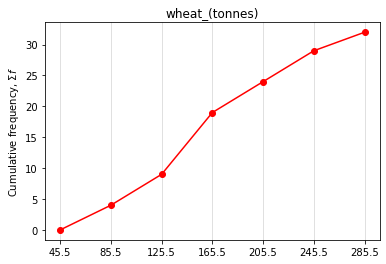

In [24]:
# Sec 2.1 Problem 21
path = '/home/mark/Documents/Class/Understanding Basic Statistics/Data/Chapter 2'
fn = 'Prob0201_21.xls'
df = pd.read_excel(os.path.join(path, fn))
cols = df.columns.values.tolist()
print(df.head(), '\n')

data = df.iloc[:,0] * 100
print(f'data:\n{data.head()}\n')

classes = 6
title = cols[0]
freq_dist(data, classes, title)
ogive(data, classes, title)


   average
0    0.194
1    0.258
2    0.190
3    0.291
4    0.158 

data:
0    194.0
1    258.0
2    190.0
3    291.0
4    158.0
Name: average, dtype: float64

min: 107.0  max: 317.0  size: 26
class width: 43
freq: [ 3  4  3 10  6]
cls_limits: [(107.0, 149.0), (150.0, 192.0), (193.0, 235.0), (236.0, 278.0), (279.0, 321.0)]
boundaries: [106.5 149.5 192.5 235.5 278.5 321.5]
midpts: [128.0, 171.0, 214.0, 257.0, 300.0]
rel_freq: [0.11538462 0.15384615 0.11538462 0.38461538 0.23076923]


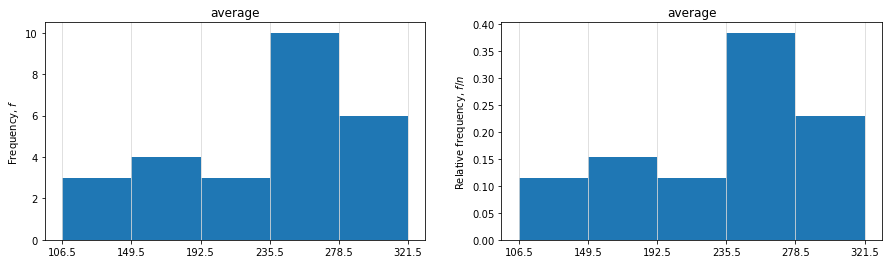

class width: 43
freq: [ 3  4  3 10  6]
cumulative: [ 0  3  7 10 20 26]
boundaries: [106.5 149.5 192.5 235.5 278.5 321.5]


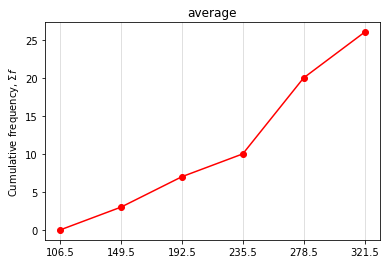

In [25]:
# Sec 2.1 Problem 22
path = '/home/mark/Documents/Class/Understanding Basic Statistics/Data/Chapter 2'
fn = 'Prob0201_22.xls'
df = pd.read_excel(os.path.join(path, fn))
cols = df.columns.values.tolist()
print(df.head(), '\n')

data = df.iloc[:,0] * 1000
print(f'data:\n{data.head()}\n')

classes = 5
title = cols[0]
freq_dist(data, classes, title)
ogive(data, classes, title)


In [26]:
def dotplot(data, title=''):
    x = []
    y = []
    unique, counts = np.unique(data, return_counts=True)
    for v, n in zip(unique, counts):
        for i in range(1, n + 1):
            x.append(v)
            y.append(i)

    w = 2
    fig, ax0 = plt.subplots(1, 1, figsize=(15, w))

    ax0.scatter(x, y, c='k')
    ax0.set_title(title)
    ax0.grid(axis='x', color='0.85')
    ax0.set_ylim((0, 6 * w))

    plt.show()
    

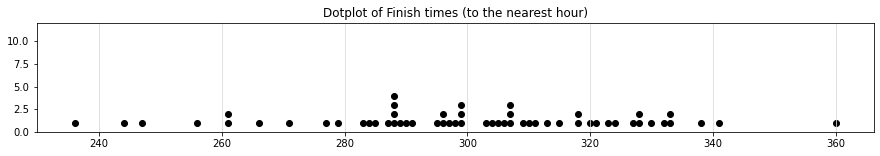

min: 236  max: 360  size: 57
class width: 25
freq: [ 4  9 25 16  3]
cls_limits: [(236, 260), (261, 285), (286, 310), (311, 335), (336, 360)]
boundaries: [235.5 260.5 285.5 310.5 335.5 360.5]
midpts: [248.0, 273.0, 298.0, 323.0, 348.0]
rel_freq: [0.07017544 0.15789474 0.43859649 0.28070175 0.05263158]


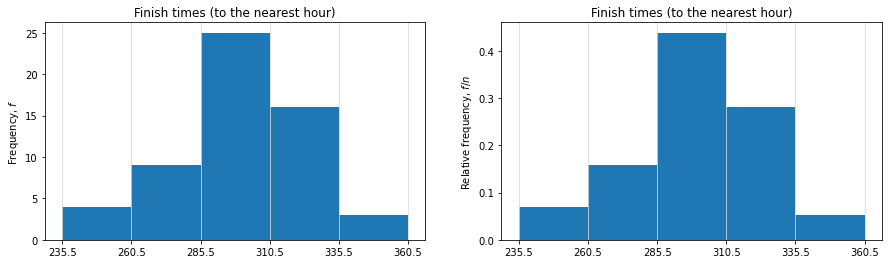

In [27]:
# Sec 2.1 Problem 24
path = '/home/mark/Documents/Class/Understanding Basic Statistics/Data/Chapter 2'
fn = 'Prob201_15.xlsx'
df = pd.read_excel(os.path.join(path, fn))
cols = df.columns.values.tolist()
# print(df.head(), '\n')

data = df.iloc[:,0]
# print(f'data:\n{data}')

classes = 5
title = cols[0]

dotplot(data, f'Dotplot of {cols[0]}')
freq_dist(data, classes, title)


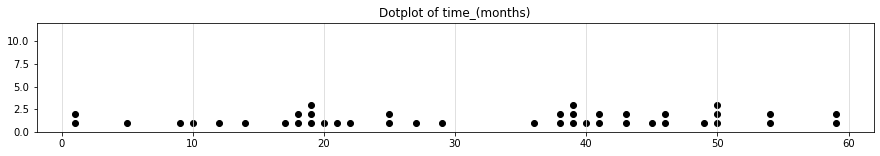

min: 1  max: 59  size: 42
class width: 12
freq: [ 6 10  5 13  8]
cls_limits: [(1, 12), (13, 24), (25, 36), (37, 48), (49, 60)]
boundaries: [ 0.5 12.5 24.5 36.5 48.5 60.5]
midpts: [6.5, 18.5, 30.5, 42.5, 54.5]
rel_freq: [0.14285714 0.23809524 0.11904762 0.30952381 0.19047619]


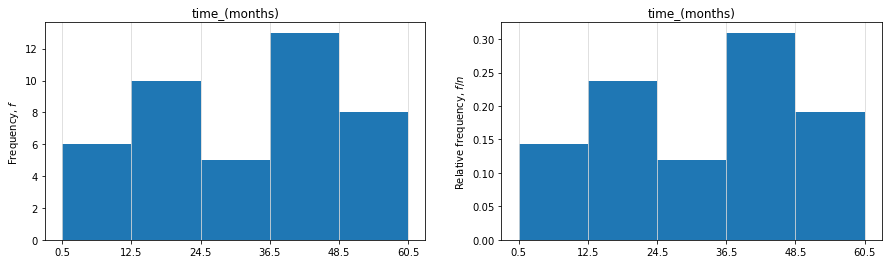

In [28]:
# Sec 2.1 Problem 25
path = '/home/mark/Documents/Class/Understanding Basic Statistics/Data/Chapter 2'
fn = 'Prob0201_17.xls'
df = pd.read_excel(os.path.join(path, fn))
cols = df.columns.values.tolist()
# print(df.head(), '\n')

data = df.iloc[:,0]
# print(f'data:\n{data}')

classes = 5
title = cols[0]

dotplot(data, f'Dotplot of {cols[0]}')
freq_dist(data, classes, title)


### Section 2.2 _Bar Graphs, Circle Graphs, and Time-Series Graphs_
